#  Automatic Coronavirus Test Kits

## 1. Basic Set and Read train.csv file.

In [1]:
from __future__ import division, print_function, unicode_literals


import numpy as np
import os

import tarfile
from six.moves import urllib

from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
np.random.seed(42)

def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib

import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=ConvergenceWarning)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
import pandas as pd #cvs file

In [3]:
d_train=pd.read_csv("train.csv")
d_test=pd.read_csv("test.csv")

## 2. Obtain the high level information of the dataset.

In this part. I checked the dataset first, because the train file and test file are seperate, so I don't need to split the dataset.Just need to drop the y labels for x and let y equal to y column as labels.

In [4]:
d_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 26 columns):
x1     30000 non-null float64
x2     30000 non-null float64
x3     30000 non-null float64
x4     30000 non-null float64
x5     30000 non-null float64
x6     30000 non-null float64
x7     30000 non-null float64
x8     30000 non-null float64
x9     30000 non-null float64
x10    30000 non-null float64
x11    30000 non-null float64
x12    30000 non-null float64
x13    30000 non-null float64
x14    30000 non-null float64
x15    30000 non-null float64
x16    30000 non-null float64
x17    30000 non-null float64
x18    30000 non-null float64
x19    30000 non-null float64
x20    30000 non-null float64
x21    30000 non-null float64
x22    30000 non-null float64
x23    30000 non-null float64
x24    30000 non-null float64
x25    30000 non-null float64
y      30000 non-null float64
dtypes: float64(26)
memory usage: 6.0 MB


All attributs are numberical. x1 is the categorical which have the classes 1,2,3

In [5]:
d_train.nunique()

x1         3
x2     30000
x3     30000
x4     30000
x5     30000
x6     30000
x7     30000
x8     30000
x9     30000
x10    30000
x11    30000
x12    30000
x13    30000
x14    30000
x15    30000
x16    30000
x17    30000
x18    30000
x19    30000
x20    30000
x21    30000
x22    30000
x23    30000
x24    30000
x25    30000
y          2
dtype: int64

In [6]:
d_train.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x17,x18,x19,x20,x21,x22,x23,x24,x25,y
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,1.852600,0.049272,0.155542,0.264086,0.327877,0.467856,0.540467,0.645905,0.772064,0.855704,...,1.607029,1.643243,1.738432,1.912739,2.122779,-0.008287,-0.003695,-0.014306,-0.007142,0.500700
std,0.852153,0.790037,1.586722,2.370197,3.182403,3.924575,4.748936,5.538706,6.337332,7.163032,...,12.645386,13.398864,14.179822,15.058734,15.889472,0.996894,0.997866,0.998303,1.002864,0.500008
min,1.000000,-4.127232,-7.546048,-11.394922,-15.703917,-17.282928,-21.532381,-29.281607,-30.208977,-34.958885,...,-65.028714,-69.516983,-69.663771,-73.657652,-72.907504,-3.928834,-3.994068,-4.192774,-3.803546,0.000000
25%,1.000000,-0.422199,-0.775418,-1.125385,-1.530502,-1.814194,-2.246759,-2.614270,-2.988377,-3.323687,...,-5.778436,-6.161997,-6.549858,-6.848749,-7.156391,-0.681687,-0.680071,-0.684913,-0.686482,0.000000
50%,2.000000,0.032569,0.141492,0.254399,0.329104,0.470329,0.495226,0.630812,0.796000,0.836376,...,1.542984,1.705728,1.776420,1.898707,2.144885,-0.009180,-0.003500,-0.013049,-0.004206,1.000000
75%,3.000000,0.503805,1.076679,1.638515,2.165261,2.768946,3.316882,3.912253,4.491845,5.015648,...,8.983422,9.508459,10.020857,10.665602,11.308316,0.666875,0.665890,0.653100,0.667001,1.000000
max,3.000000,3.768093,7.606813,12.314023,14.647326,23.133919,24.032719,27.760556,32.032490,36.809509,...,66.652373,59.753684,79.408555,68.661508,77.972068,3.581391,4.616384,3.815528,4.014202,1.000000


In [7]:
d_train.shape

(30000, 26)

In [8]:
d_test.shape

(10000, 26)

In [9]:
d_train.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x17,x18,x19,x20,x21,x22,x23,x24,x25,y
0,3.0,-0.183355,-4.634184,1.184842,5.470261,3.672736,-4.030212,2.689942,8.962724,2.484879,...,-15.994611,15.024532,23.204973,2.528437,8.962604,0.266541,-1.383385,-1.029273,1.711146,1.0
1,2.0,1.643093,0.232917,-3.235598,-0.082242,-6.190242,-2.308474,-0.968020,-5.374390,2.460543,...,22.711908,45.220479,-0.635627,22.675962,32.937243,-1.082314,0.571426,-0.063689,-3.122653,1.0
2,1.0,0.812938,0.095642,-1.170322,-1.808930,-2.618295,1.613534,-5.186820,-0.011963,3.381312,...,-3.333037,-8.586271,-3.326587,5.033094,-5.385510,-1.281024,-0.788055,0.505804,-0.891985,0.0
3,2.0,-0.250723,0.011880,2.086732,-2.476512,-0.265453,4.399695,-0.159362,0.674294,-7.503565,...,4.438590,9.183342,7.087640,25.453062,12.087652,-0.613746,0.141558,-0.206084,0.538862,0.0
4,2.0,1.215325,1.675581,2.193322,2.983158,0.007759,2.983193,2.731582,2.418476,-6.947729,...,-21.198210,19.839208,9.945454,13.003429,-10.114149,-0.111361,-0.954487,0.825140,1.437519,1.0


In [10]:
d_train.isnull().sum()

x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
x16    0
x17    0
x18    0
x19    0
x20    0
x21    0
x22    0
x23    0
x24    0
x25    0
y      0
dtype: int64

In [11]:
d_train.corr()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x17,x18,x19,x20,x21,x22,x23,x24,x25,y
x1,1.000000,0.042812,0.017001,0.022066,0.012279,0.011284,0.002843,0.007657,0.002178,0.004642,...,0.002294,-0.001718,0.006434,0.002433,0.001746,-0.004724,-0.001768,-0.001951,-0.007909,0.645521
x2,0.042812,1.000000,0.009370,0.004814,0.004140,0.010911,-0.003001,0.002167,0.000793,-0.000320,...,0.008952,0.007413,0.017165,-0.004667,0.009169,-0.005354,0.001802,0.006215,-0.006513,0.059027
x3,0.017001,0.009370,1.000000,-0.013277,-0.000698,-0.000171,-0.009328,0.002285,-0.000420,-0.004048,...,0.001640,-0.003407,0.016397,-0.002907,0.004583,0.001094,0.002264,0.004520,-0.008032,0.032038
x4,0.022066,0.004814,-0.013277,1.000000,-0.002496,-0.000451,-0.011144,-0.011622,-0.001187,0.003624,...,0.006318,-0.001546,-0.007427,0.001795,0.005536,0.009955,0.003050,-0.013507,-0.003394,0.021911
x5,0.012279,0.004140,-0.000698,-0.002496,1.000000,-0.002483,-0.001346,-0.009791,0.008413,-0.000734,...,0.003574,0.000143,-0.001876,-0.012364,-0.002799,0.002720,-0.009968,-0.006636,0.006353,0.014382
x6,0.011284,0.010911,-0.000171,-0.000451,-0.002483,1.000000,-0.003190,0.009258,0.006450,-0.003758,...,-0.008373,-0.000469,-0.006034,0.017874,0.012135,0.007652,0.006681,0.007486,-0.001817,0.005985
x7,0.002843,-0.003001,-0.009328,-0.011144,-0.001346,-0.003190,1.000000,0.010753,-0.004935,0.005462,...,-0.006655,0.004709,0.005212,-0.002142,-0.000945,0.006439,-0.006021,-0.000096,0.002996,0.013571
x8,0.007657,0.002167,0.002285,-0.011622,-0.009791,0.009258,0.010753,1.000000,-0.001296,-0.007731,...,0.015459,-0.004069,0.001232,0.000194,0.008315,0.002742,-0.005390,-0.002110,-0.005346,0.003217
x9,0.002178,0.000793,-0.000420,-0.001187,0.008413,0.006450,-0.004935,-0.001296,1.000000,-0.004187,...,0.010846,0.002539,0.011296,-0.006515,0.002016,-0.007069,0.009434,-0.007807,-0.011048,0.011117
x10,0.004642,-0.000320,-0.004048,0.003624,-0.000734,-0.003758,0.005462,-0.007731,-0.004187,1.000000,...,-0.004846,0.020812,0.004163,0.005138,0.000689,0.003840,0.008389,0.000248,-0.002562,0.013250


In [12]:
x=d_train.drop('y',axis=1)
y=d_train['y'].copy()

x_test=d_test.drop('y',axis=1)
y_test=d_test['y'].copy()

In [13]:
#x_values=x_data.values
#x=np.array(x_values)
#for i in range(25):
#    x[:,i]=x[:,i]/(x[:,i].max()-x[:,i].min())

In [14]:
x.shape

(30000, 25)

In [15]:
x

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25
0,3.0,-0.183355,-4.634184,1.184842,5.470261,3.672736,-4.030212,2.689942,8.962724,2.484879,...,-6.469738,-15.994611,15.024532,23.204973,2.528437,8.962604,0.266541,-1.383385,-1.029273,1.711146
1,2.0,1.643093,0.232917,-3.235598,-0.082242,-6.190242,-2.308474,-0.968020,-5.374390,2.460543,...,5.488683,22.711908,45.220479,-0.635627,22.675962,32.937243,-1.082314,0.571426,-0.063689,-3.122653
2,1.0,0.812938,0.095642,-1.170322,-1.808930,-2.618295,1.613534,-5.186820,-0.011963,3.381312,...,2.264152,-3.333037,-8.586271,-3.326587,5.033094,-5.385510,-1.281024,-0.788055,0.505804,-0.891985
3,2.0,-0.250723,0.011880,2.086732,-2.476512,-0.265453,4.399695,-0.159362,0.674294,-7.503565,...,10.880357,4.438590,9.183342,7.087640,25.453062,12.087652,-0.613746,0.141558,-0.206084,0.538862
4,2.0,1.215325,1.675581,2.193322,2.983158,0.007759,2.983193,2.731582,2.418476,-6.947729,...,5.877623,-21.198210,19.839208,9.945454,13.003429,-10.114149,-0.111361,-0.954487,0.825140,1.437519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.0,0.342190,0.055188,-0.572283,0.574764,3.855534,6.558000,5.319750,-2.841825,-2.912564,...,6.392150,-3.143389,7.421855,0.749486,9.407745,-16.139067,0.871199,0.270625,0.035268,-0.858278
29996,1.0,0.438052,-0.064013,1.261939,2.458425,-2.141189,0.812509,0.854281,10.114633,-3.525051,...,-15.205190,-13.992396,18.326917,6.937393,10.878877,-22.235942,0.950296,-0.782184,0.439711,0.246343
29997,3.0,0.588171,1.798733,-0.660610,-3.502469,4.491251,11.738760,2.148399,12.240018,10.362100,...,-14.147107,13.963867,4.506591,10.880007,3.395453,-15.555963,-1.450757,1.036389,-0.098259,0.791844
29998,1.0,0.134892,0.111594,-1.338915,0.349295,-2.937067,0.127768,6.326368,3.991437,-3.354036,...,20.031081,11.039819,3.334003,7.794350,-0.123210,-9.375042,0.500927,0.806953,-0.248629,0.310851


## 3. Plot histograms of all the attributes.

all attributs means x1 to x25.We can check the each attribute distribution

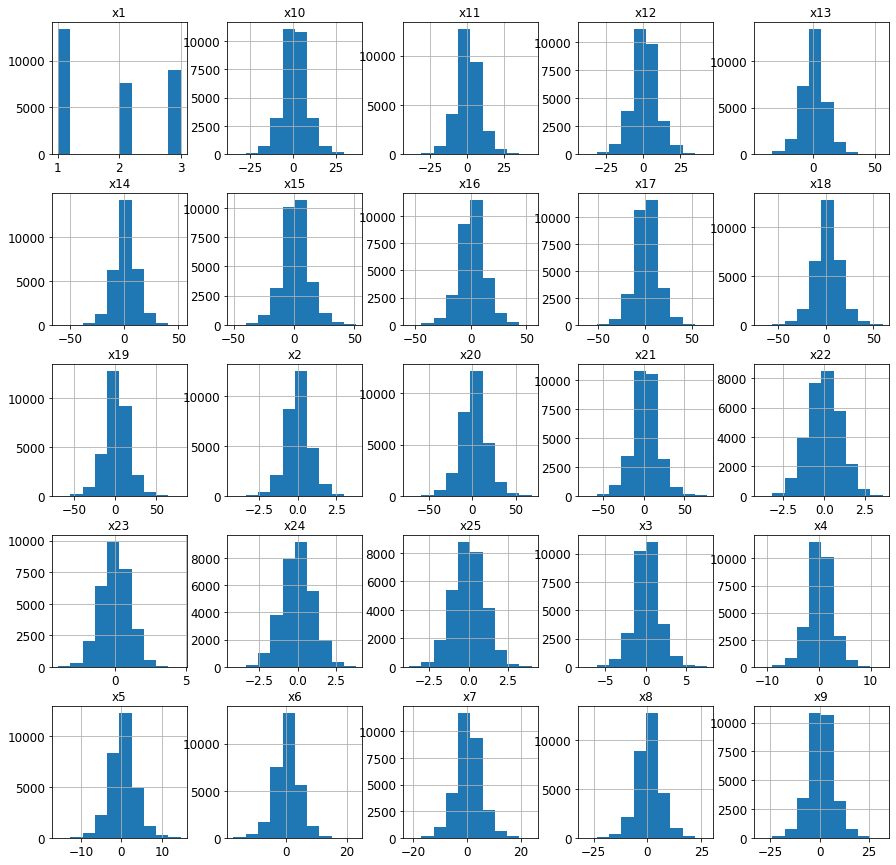

In [16]:
x.hist(figsize=[15,15])
plt.show()

## 4. Handle both categorical and numerical attributes. And use pipelines to prepare data for later steps.
 

x1 is the categorical and x2 to x25 are numerical, so we need to check 
get the dataset which included x1 and other included x2-x25 in order to 
use pipelines and get the prepared data. This is used as a X_train.


In [17]:
round(d_train.drop('y', axis=1).mean(), 2)

x1     1.85
x2     0.05
x3     0.16
x4     0.26
x5     0.33
x6     0.47
x7     0.54
x8     0.65
x9     0.77
x10    0.86
x11    0.85
x12    1.08
x13    1.16
x14    1.19
x15    1.27
x16    1.46
x17    1.61
x18    1.64
x19    1.74
x20    1.91
x21    2.12
x22   -0.01
x23   -0.00
x24   -0.01
x25   -0.01
dtype: float64

In [18]:
corr_matrix = x.corr()
corr_matrix["x1"].sort_values(ascending=False)

x1     1.000000
x2     0.042812
x4     0.022066
x3     0.017001
x5     0.012279
x6     0.011284
x15    0.010383
x12    0.009908
x16    0.008739
x8     0.007657
x19    0.006434
x10    0.004642
x7     0.002843
x20    0.002433
x17    0.002294
x9     0.002178
x21    0.001746
x13    0.001593
x18   -0.001718
x23   -0.001768
x24   -0.001951
x14   -0.003007
x22   -0.004724
x11   -0.006223
x25   -0.007909
Name: x1, dtype: float64

In [19]:

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder


In [20]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
d_num = x.drop("x1", axis=1)
d_cat = x[["x1"]]

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

d_num_tr = num_pipeline.fit_transform(d_num)

In [22]:
d_num_tr

array([[-0.29445543, -3.01867991,  0.388479  , ..., -1.38266321,
        -1.0167101 ,  1.71340928],
       [ 2.01743404,  0.04876503, -1.47656173, ...,  0.57636043,
        -0.04946777, -3.10666585],
       [ 0.96663571, -0.03775175, -0.60519514, ..., -0.78605085,
         0.5210024 , -0.88233162],
       ...,
       [ 0.68213   ,  1.03560596, -0.39014087, ...,  1.04232486,
        -0.08409703,  0.79671719],
       [ 0.10837612, -0.02769797, -0.67632665, ...,  0.81239487,
        -0.23472567,  0.3170894 ],
       [-1.24786564, -0.34855752,  0.25224832, ..., -0.34707399,
         0.11676318, -0.44206346]])

In [23]:
try:
    from sklearn.compose import ColumnTransformer
except ImportError:
    from future_encoders import ColumnTransformer # Scikit-Learn < 0.20

In [24]:
num_attribs = list(d_num)
cat_attribs = ["x1"]



full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

d_prepared = full_pipeline.fit_transform(d_train)

In [25]:
d_prepared

array([[-0.29445543, -3.01867991,  0.388479  , ...,  0.        ,
         0.        ,  1.        ],
       [ 2.01743404,  0.04876503, -1.47656173, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.96663571, -0.03775175, -0.60519514, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 0.68213   ,  1.03560596, -0.39014087, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.10837612, -0.02769797, -0.67632665, ...,  1.        ,
         0.        ,  0.        ],
       [-1.24786564, -0.34855752,  0.25224832, ...,  1.        ,
         0.        ,  0.        ]])

In [26]:
d_prepared.shape

(30000, 27)

## 5.Report the importance of each attribute by using the random forest classifier.


Set the randomforest clf first, then directly used the "fearture_importances to get the attribut importance. I also add the attributes' name and sort it. Finally draw the importance-unimportance colorbar in the end

In [27]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
rnd_clf.fit(d_prepared,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [28]:
import pandas as pd
feature_imp = pd.Series(rnd_clf.feature_importances_)
feature_imp

0     0.066220
1     0.047476
2     0.040552
3     0.037200
4     0.027759
5     0.018359
6     0.030295
7     0.026962
8     0.027007
9     0.025458
10    0.017877
11    0.033973
12    0.022143
13    0.019162
14    0.027095
15    0.016163
16    0.024196
17    0.037310
18    0.021922
19    0.044110
20    0.005925
21    0.006262
22    0.006419
23    0.006729
24    0.187427
25    0.085603
26    0.090393
dtype: float64

In [29]:
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs +cat_one_hot_attribs
sorted(zip(feature_imp, attributes), reverse=True)

[(0.18742690113642227, 1.0),
 (0.09039315666094627, 3.0),
 (0.08560323527464288, 2.0),
 (0.06622047932432193, 'x2'),
 (0.04747636540348084, 'x3'),
 (0.04411010908833692, 'x21'),
 (0.04055176616522907, 'x4'),
 (0.03730984101355449, 'x19'),
 (0.037200425421717545, 'x5'),
 (0.03397301666662274, 'x13'),
 (0.030295461947032025, 'x8'),
 (0.02775854292128737, 'x6'),
 (0.027094925426229453, 'x16'),
 (0.027006999668344522, 'x10'),
 (0.02696232554863017, 'x9'),
 (0.02545842335514964, 'x11'),
 (0.024195740302038908, 'x18'),
 (0.022143483034802895, 'x14'),
 (0.021921571718092923, 'x20'),
 (0.019162267894400065, 'x15'),
 (0.01835911734450126, 'x7'),
 (0.01787714144457945, 'x12'),
 (0.016162752280428988, 'x17'),
 (0.006729344605714366, 'x25'),
 (0.006419367028901675, 'x24'),
 (0.006261745957182872, 'x23'),
 (0.005925493367408473, 'x22')]

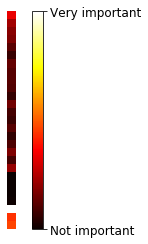

In [30]:
def plot_digit(data):
    image = data.reshape(27,1)
    plt.imshow(image, cmap = mpl.cm.hot,
               interpolation="nearest")
    plt.axis("off")
plot_digit(rnd_clf.feature_importances_)

bar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
bar.ax.set_yticklabels(['Not important', 'Very important'])

plt.show()

## 6. Train 3 different promising classifiers in terms of accuracy, and use these classifiers to obtain a soft-voting classifier.
### - Report the accuracy of each of these classifiers. 1
### - Use 3-fold cross-validation for this step.

This part I tried many classifer and finaly I choose those 3 clfs.Bcause the accuracy score are high and similar. For the voting classifer, set it to soft in order to get the percentage.
Finally i post the accuracy score together and we can clearly find that the svm clf has the highest score.

In [31]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.linear_model import SGDClassifier


ext_clf=ExtraTreesClassifier(n_estimators=10, random_state=42)
mlp_clf = MLPClassifier(random_state=42)
svm_clf = SVC(gamma="auto", random_state=42,probability = True)

In [32]:
estimators = [ext_clf, mlp_clf,svm_clf]
for estimator in estimators:
    print("Training the", estimator)
    estimator.fit(d_prepared,y)

Training the ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=42, verbose=0,
                     warm_start=False)
Training the MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)
Trai

In [33]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
named_estimators = [

    ("extra_trees_clf", ext_clf),
    ("mlp_clf", mlp_clf),
    ("svm_clf", svm_clf),
    
]



In [34]:
voting_clf = VotingClassifier(named_estimators)

In [35]:
voting_clf.fit(d_prepared,y)

VotingClassifier(estimators=[('extra_trees_clf',
                              ExtraTreesClassifier(bootstrap=False,
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=10, n_jobs=None,
                                                   oob_score=False,
      

In [36]:

voting_clf.voting = "soft"

In [38]:
from sklearn.model_selection import cross_val_score

Report the accuracy score of each classifiers

In [39]:
print('ext_clf:', cross_val_score(ext_clf, d_prepared, y, cv=3, scoring="accuracy"))
print('mlp_clf:', cross_val_score(mlp_clf, d_prepared, y, cv=3, scoring="accuracy"))
print('svm_clf:', cross_val_score(svm_clf, d_prepared, y, cv=3, scoring="accuracy"))
print('soft_voting_clf:', cross_val_score(voting_clf, d_prepared, y, cv=3, scoring="accuracy"))

ext_clf: [0.9548 0.9572 0.9546]
mlp_clf: [0.9815 0.9845 0.9853]
svm_clf: [0.9868 0.9878 0.9881]
soft_voting_clf: [0.9867 0.9871 0.9873]


We can see the svm_clf have the greatest accuracy score

## 7. Explore the above 4 classifiers on the recall and precision trade-off and find a classifier that suits our purpose the most.
### • Plot the ROC curves for these classifiers.
### • Calculate the ROC AUC scores for these classifiers.
### • Plot the precision versus recall for these classifiers.
### • Find out the precision for each classifier when the recall is 1, and use these values to choose the classifier for our purpose.
 

The point of this part is to correctly set the function of plot roc curve and plot precision vs recall.

All the plots seems very great but the highest score of roc_auc_score is SVM_clf and we can find that the precision of extracttree and randome forest are same because they are same types.
And svm_clf have the highest precision which already larger than 69%. So I chooes this classifier which suits the purpose most

In [40]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score

from sklearn.metrics import roc_auc_score
def plot_roc_curve(fpr, tpr, label=None): 
    plt.plot(fpr, tpr, linewidth=2, label=label) 
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.axis([0, 1, 0, 1]) 
    plt.xlabel('False Positive Rate') 
    plt.ylabel('True Positive Rate') 
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])


    

## RandomForestClassifier

ROC curve plot


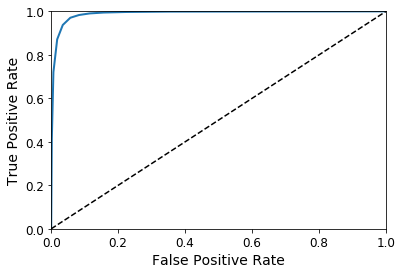

In [41]:

rnd_clf_scores = cross_val_predict(rnd_clf, d_prepared, y, cv=3, method = 'predict_proba')[:,-1]
fpr, tpr, thresholds = roc_curve(y, rnd_clf_scores)
plot_roc_curve(fpr, tpr) 
print("ROC curve plot")
plt.show()

In [42]:
roc_auc_score(y, rnd_clf_scores)

0.989277541206203

precision_vs_recall_plot


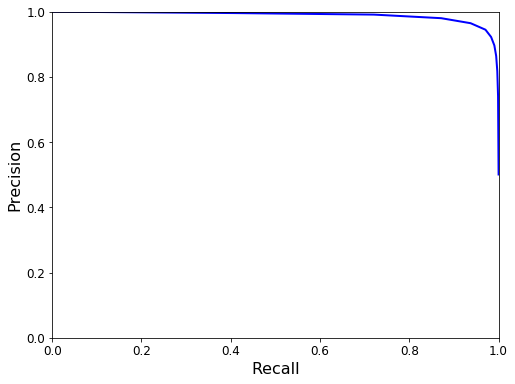

In [45]:
precisions, recalls,thresholds = precision_recall_curve(y, rnd_clf_scores)
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
print("precision_vs_recall_plot")
plt.show()

In [46]:
thresholds = thresholds[np.argmax(recalls >= 1)]
y_pred_1 = (rnd_clf_scores >= thresholds)
print('Precision: ', precision_score(y, y_pred_1))

Precision:  0.5007


##  ExtraTreesClassifier

ROC curve plot


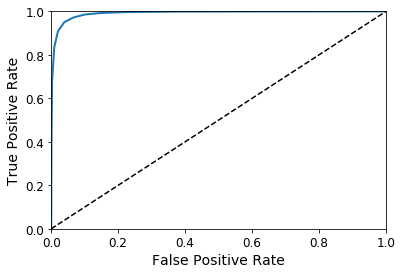

In [47]:
ext_clf_scores = cross_val_predict(ext_clf, d_prepared, y, cv=3, method = 'predict_proba')[:,-1]
fpr, tpr, thresholds = roc_curve(y, ext_clf_scores)
plot_roc_curve(fpr, tpr)
print("ROC curve plot")
plt.show()

In [48]:
roc_auc_score(y, ext_clf_scores)

0.9907411374081848

precision_vs_recall_plot


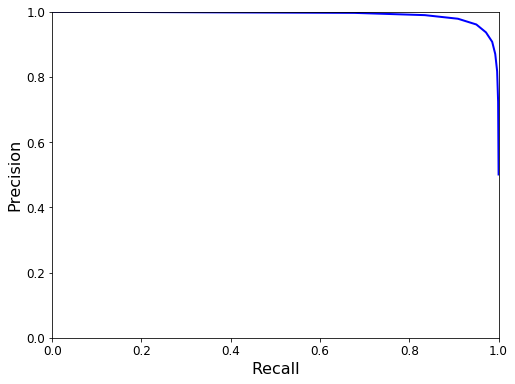

In [50]:
precisions, recalls,thresholds = precision_recall_curve(y, ext_clf_scores)
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
print("precision_vs_recall_plot")
plt.show()

In [51]:
thresholds2 = thresholds[np.argmax(recalls >= 1)]
y_pred_2 = (ext_clf_scores >= thresholds2)
print('Precision: ', precision_score(y, y_pred_2))

Precision:  0.5007


## MLPClassifier

ROC curve plot


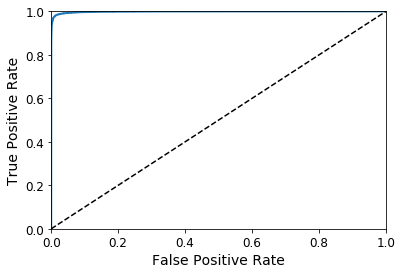

In [105]:
mlp_clf_scores = cross_val_predict(mlp_clf, d_prepared, y, cv=3, method = 'predict_proba')[:,-1]
fpr, tpr, thresholds = roc_curve(y, mlp_clf_scores)
plot_roc_curve(fpr, tpr) 
print("ROC curve plot")
plt.show()

In [106]:
roc_auc_score(y, mlp_clf_scores)

0.9984272102506655

precision_vs_recall_plot


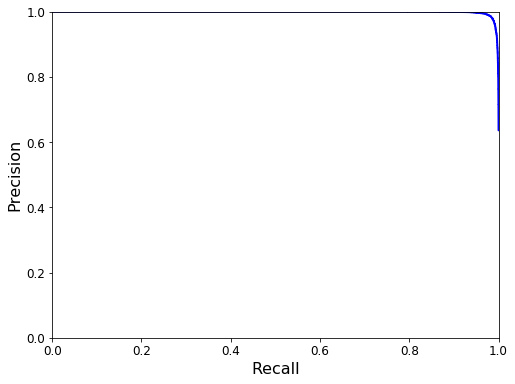

In [107]:
precisions, recalls,thresholds = precision_recall_curve(y, mlp_clf_scores)
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
print("precision_vs_recall_plot")
plt.show()

In [109]:
thresholds3 = thresholds[np.argmax(recalls >= 1)]
y_pred_3 = (mlp_clf_scores >= thresholds3)
print('Precision: ', precision_score(y, y_pred_3))

Precision:  0.63615957987464


## SVM

ROC curve plot


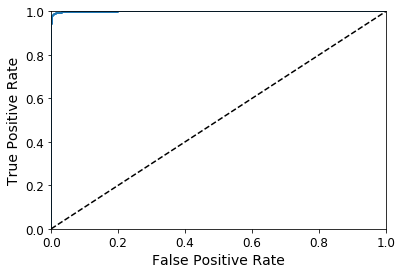

In [57]:
svm_clf_scores = cross_val_predict(svm_clf, d_prepared, y, cv=3,method="decision_function")
fpr, tpr, thresholds = roc_curve(y, svm_clf_scores)
plot_roc_curve(fpr, tpr) 
print("ROC curve plot")
plt.show()

In [58]:
roc_auc_score(y, svm_clf_scores)

0.9991277849571252

precision_vs_recall_plot


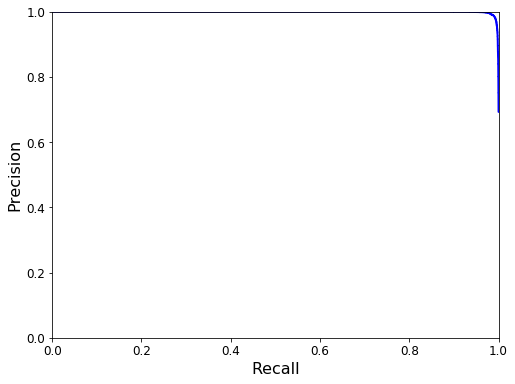

In [59]:
precisions, recalls,thresholds = precision_recall_curve(y, svm_clf_scores)
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
print("precision_vs_recall_plot")
plt.show()

In [61]:
thresholds4= thresholds[np.argmax(recalls >= 1)]
y_pred_4 = (svm_clf_scores >= thresholds4)
print('Precision: ', precision_score(y, y_pred_4))

Precision:  0.6925630503942091


## Soft-voting-classifer 

ROC curve plot


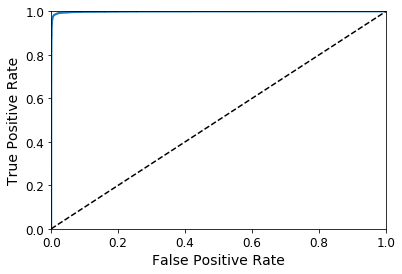

In [62]:
voting_clf_scores = cross_val_predict(voting_clf, d_prepared, y, cv=3, method = 'predict_proba')[:,-1]
fpr, tpr, thresholds = roc_curve(y, voting_clf_scores)
plot_roc_curve(fpr, tpr) 
print("ROC curve plot")
plt.show()

In [63]:
roc_auc_score(y, voting_clf_scores)

0.9985855527832389

precision_vs_recall_plot


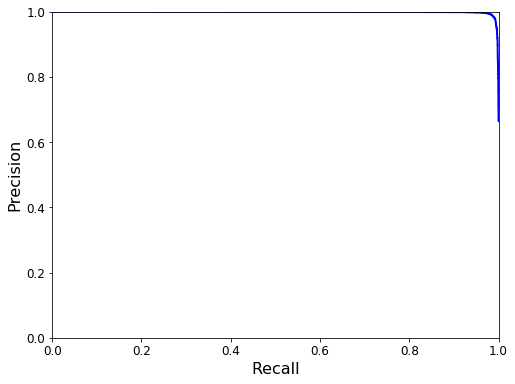

In [65]:
precisions, recalls,thresholds = precision_recall_curve(y, voting_clf_scores)
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
print("precision_vs_recall_plot")
plt.show()

In [66]:
thresholds5= thresholds[np.argmax(recalls >= 1)]
y_pred_5 = (voting_clf_scores >= thresholds5)

print('Precision: ', precision_score(y, y_pred_5))

Precision:  0.6639409476661952


In [111]:
print("rnd clf precision:",precision_score(y, y_pred_1))
print("ext clf precision:",precision_score(y, y_pred_2))
print("mlp clf precision:",precision_score(y, y_pred_3))
print("svm clf precision:",precision_score(y, y_pred_4))
print("soft voting clf precision:",precision_score(y, y_pred_5))

rnd clf precision: 0.5007
ext clf precision: 0.5007
mlp clf precision: 0.63615957987464
svm clf precision: 0.6925630503942091
soft voting clf precision: 0.6639409476661952


We can see that the svm clf's precision is the best

## 8. Fine-tune the hyperparameters for the chosen classifier in terms of recall.

I run this gridsearch for 4 hours. When I got the result, I removed some parameter of gridsearch that will run faster.
Then we can get the best parameter and best score of grid search

In [41]:
mlp_clf.get_params().keys()

dict_keys(['activation', 'alpha', 'batch_size', 'beta_1', 'beta_2', 'early_stopping', 'epsilon', 'hidden_layer_sizes', 'learning_rate', 'learning_rate_init', 'max_iter', 'momentum', 'n_iter_no_change', 'nesterovs_momentum', 'power_t', 'random_state', 'shuffle', 'solver', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [84]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 10],  
              'gamma': [0.1, 0.01], 
              'kernel': ['rbf']}  

svm_clf = SVC(gamma="auto", random_state=42, probability = True)
grid_clf = GridSearchCV(svm_clf, param_grid, refit = True, verbose = 3) 
grid_clf.fit(d_prepared, y)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] C=1, gamma=0.1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.986, total=  24.8s
[CV] C=1, gamma=0.1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   24.8s remaining:    0.0s


[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.989, total=  26.2s
[CV] C=1, gamma=0.1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   51.0s remaining:    0.0s


[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.989, total=  28.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.985, total=  27.4s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.987, total=  29.3s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.987, total=  25.8s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.986, total=  35.1s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.987, total=  32.5s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.988, total=  34.2s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  5.2min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto', kernel='rbf', max_iter=-1,
                           probability=True, random_state=42, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 10], 'gamma': [0.1, 0.01], 'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [85]:
grid_clf.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [86]:
grid_clf.best_score_

0.9878333333333333

## 9. Use the best hyperparameters obtain above for the classifier to obtain the precision value when the recall is 1 using 3-fold cross-validation. If the precision is well above our target 0.70, go to the last step. 

The final presition after change the hyperparameters is aroud 71%, just fit the requirement, I also drow the new roc curve and precition vs recall plot that we can see it is better than the old one.

In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
d_prepared_scaled = scaler.fit_transform(d_prepared.astype(np.float64))

In [88]:
svm_clf_new = grid_clf.best_estimator_


In [89]:
svm_clf_score_new = cross_val_predict(svm_clf_new, d_prepared_scaled, y, cv=3, method = 'predict_proba')[:,-1]

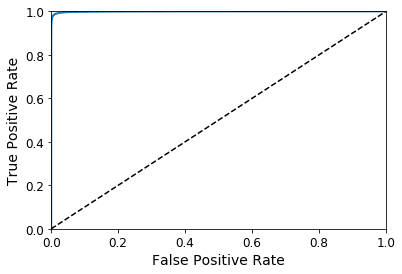

In [90]:
fpr, tpr, thresholds = roc_curve(y,svm_clf_score_new )
plot_roc_curve(fpr, tpr) 
plt.show()

In [91]:
roc_auc_score(y, svm_clf_score_new )

0.9991251782853494

precision_vs_recall_plot


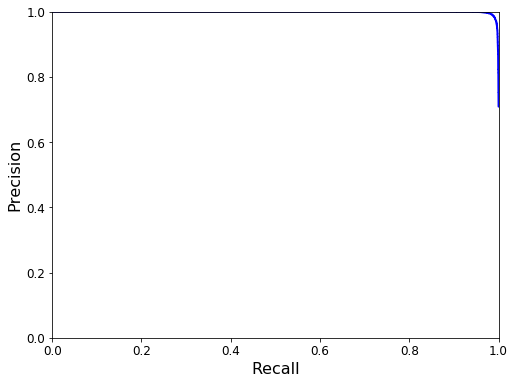

In [92]:
precisions, recalls,thresholds = precision_recall_curve(y, svm_clf_score_new)
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
print("precision_vs_recall_plot")
plt.show()

In [94]:
thresholds_final= thresholds[np.argmax(recalls >= 1)]
y_pred_final = (svm_clf_score_new >= thresholds_final)

print("Precision: {:.2f}%".format(100 *precision_score(y, y_pred_final)))

Precision: 70.89%


## 10. Use the test data from test.csv to check whether we can achieve the proposed require- ment on recall and precision.
 

we need to pipeline get the prepare data of test data first, same as the train data. Than we can get the prediction base on the grid search result. And the precision and recall data 

In [96]:
final_model = grid_clf.best_estimator_

In [99]:
x_test_prepared = full_pipeline.transform(d_test)

In [100]:
final_predictions = final_model.predict(x_test_prepared)

In [102]:
print("Precision: {:.2f}%".format(100 * precision_score(y_test, final_predictions)))

Precision: 99.27%


In [103]:
print("Recall: {:.2f}%".format(100 * recall_score(y_test, final_predictions)))

Recall: 98.23%
